## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  34.577863   563.649841  0.346853   8.226788  1.458241
1  46.024712  1120.188722  0.997012   2.460179  1.592723
2  27.178711   850.416446  0.856046   9.512756  1.517250
3  52.066645   636.273649  0.806801  10.974413  1.539420
4  81.717034   842.652539  0.731774   4.366139  1.438509


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.27055 | train_mse: 4.79103 | train_mae: 1.67797 |  0:00:00s
epoch 1  | loss: 0.8096  | train_mse: 4.49434 | train_mae: 1.6684  |  0:00:00s


epoch 2  | loss: 0.52037 | train_mse: 4.61631 | train_mae: 1.66635 |  0:00:00s
epoch 3  | loss: 0.61821 | train_mse: 3.11424 | train_mae: 1.37349 |  0:00:00s


epoch 4  | loss: 0.47925 | train_mse: 3.59577 | train_mae: 1.38174 |  0:00:01s
epoch 5  | loss: 0.39073 | train_mse: 3.55131 | train_mae: 1.37894 |  0:00:01s


epoch 6  | loss: 0.43741 | train_mse: 3.31531 | train_mae: 1.30767 |  0:00:01s
epoch 7  | loss: 0.40265 | train_mse: 2.93102 | train_mae: 1.25528 |  0:00:01s


epoch 8  | loss: 0.29616 | train_mse: 2.57924 | train_mae: 1.19206 |  0:00:01s
epoch 9  | loss: 0.36414 | train_mse: 1.46086 | train_mae: 0.91493 |  0:00:01s
epoch 10 | loss: 0.50466 | train_mse: 0.88273 | train_mae: 0.71316 |  0:00:01s


epoch 11 | loss: 0.33842 | train_mse: 0.89678 | train_mae: 0.67912 |  0:00:02s
epoch 12 | loss: 0.42479 | train_mse: 0.70208 | train_mae: 0.62025 |  0:00:02s
epoch 13 | loss: 0.30192 | train_mse: 0.72259 | train_mae: 0.60637 |  0:00:02s


epoch 14 | loss: 0.16382 | train_mse: 0.55721 | train_mae: 0.54578 |  0:00:02s
epoch 15 | loss: 0.19113 | train_mse: 0.4672  | train_mae: 0.47669 |  0:00:02s
epoch 16 | loss: 0.22822 | train_mse: 0.63963 | train_mae: 0.55986 |  0:00:02s


epoch 17 | loss: 0.41763 | train_mse: 0.66106 | train_mae: 0.58365 |  0:00:02s


epoch 18 | loss: 0.28026 | train_mse: 0.7618  | train_mae: 0.60555 |  0:00:02s


epoch 19 | loss: 0.14842 | train_mse: 0.48867 | train_mae: 0.47919 |  0:00:03s


epoch 20 | loss: 0.1106  | train_mse: 0.23696 | train_mae: 0.3483  |  0:00:03s
epoch 21 | loss: 0.25789 | train_mse: 0.18315 | train_mae: 0.30034 |  0:00:03s


epoch 22 | loss: 0.24904 | train_mse: 0.35515 | train_mae: 0.41282 |  0:00:03s
epoch 23 | loss: 0.16215 | train_mse: 0.3812  | train_mae: 0.43207 |  0:00:03s
epoch 24 | loss: 0.28144 | train_mse: 0.2158  | train_mae: 0.3636  |  0:00:03s


epoch 25 | loss: 0.14635 | train_mse: 0.17215 | train_mae: 0.32165 |  0:00:03s
epoch 26 | loss: 0.2981  | train_mse: 0.14134 | train_mae: 0.29692 |  0:00:03s
epoch 27 | loss: 0.17554 | train_mse: 0.20775 | train_mae: 0.3383  |  0:00:03s
epoch 28 | loss: 0.17194 | train_mse: 0.2043  | train_mae: 0.3471  |  0:00:03s


epoch 29 | loss: 0.21616 | train_mse: 0.33317 | train_mae: 0.42163 |  0:00:04s
epoch 30 | loss: 0.19245 | train_mse: 0.43382 | train_mae: 0.45017 |  0:00:04s
epoch 31 | loss: 0.19119 | train_mse: 0.42276 | train_mae: 0.44801 |  0:00:04s


epoch 32 | loss: 0.2519  | train_mse: 0.51123 | train_mae: 0.46054 |  0:00:04s
epoch 33 | loss: 0.12091 | train_mse: 0.46933 | train_mae: 0.43724 |  0:00:04s
epoch 34 | loss: 0.20279 | train_mse: 0.30551 | train_mae: 0.36118 |  0:00:04s


epoch 35 | loss: 0.1838  | train_mse: 0.23186 | train_mae: 0.33973 |  0:00:04s
epoch 36 | loss: 0.09599 | train_mse: 0.29569 | train_mae: 0.37574 |  0:00:04s
epoch 37 | loss: 0.15251 | train_mse: 0.32351 | train_mae: 0.38316 |  0:00:04s
epoch 38 | loss: 0.15982 | train_mse: 0.09875 | train_mae: 0.25462 |  0:00:04s


epoch 39 | loss: 0.12954 | train_mse: 0.06795 | train_mae: 0.20858 |  0:00:04s
epoch 40 | loss: 0.25918 | train_mse: 0.07035 | train_mae: 0.20957 |  0:00:04s
epoch 41 | loss: 0.13585 | train_mse: 0.13849 | train_mae: 0.27455 |  0:00:04s
epoch 42 | loss: 0.16975 | train_mse: 0.41195 | train_mae: 0.42125 |  0:00:04s


epoch 43 | loss: 0.13204 | train_mse: 0.50943 | train_mae: 0.43528 |  0:00:05s
epoch 44 | loss: 0.19825 | train_mse: 0.50868 | train_mae: 0.43112 |  0:00:05s
epoch 45 | loss: 0.21073 | train_mse: 0.35137 | train_mae: 0.3878  |  0:00:05s


epoch 46 | loss: 0.21771 | train_mse: 0.21612 | train_mae: 0.31867 |  0:00:05s
epoch 47 | loss: 0.28307 | train_mse: 0.19351 | train_mae: 0.31906 |  0:00:05s
epoch 48 | loss: 0.13405 | train_mse: 0.16251 | train_mae: 0.31358 |  0:00:05s


epoch 49 | loss: 0.19091 | train_mse: 0.21371 | train_mae: 0.34645 |  0:00:05s
epoch 50 | loss: 0.13817 | train_mse: 0.29641 | train_mae: 0.37106 |  0:00:05s
epoch 51 | loss: 0.093   | train_mse: 0.27704 | train_mae: 0.35413 |  0:00:05s


epoch 52 | loss: 0.1658  | train_mse: 0.2612  | train_mae: 0.35545 |  0:00:05s
epoch 53 | loss: 0.29275 | train_mse: 0.20626 | train_mae: 0.32491 |  0:00:05s


epoch 54 | loss: 0.22903 | train_mse: 0.0983  | train_mae: 0.24379 |  0:00:06s
epoch 55 | loss: 0.14405 | train_mse: 0.07466 | train_mae: 0.2205  |  0:00:06s


epoch 56 | loss: 0.09494 | train_mse: 0.08138 | train_mae: 0.2242  |  0:00:06s
epoch 57 | loss: 0.13407 | train_mse: 0.12695 | train_mae: 0.25722 |  0:00:06s
epoch 58 | loss: 0.0693  | train_mse: 0.21101 | train_mae: 0.30393 |  0:00:06s


epoch 59 | loss: 0.10707 | train_mse: 0.20679 | train_mae: 0.2926  |  0:00:06s
epoch 60 | loss: 0.14097 | train_mse: 0.10614 | train_mae: 0.23694 |  0:00:06s
epoch 61 | loss: 0.09541 | train_mse: 0.07284 | train_mae: 0.20954 |  0:00:06s
epoch 62 | loss: 0.09399 | train_mse: 0.06691 | train_mae: 0.1984  |  0:00:06s


epoch 63 | loss: 0.21151 | train_mse: 0.06559 | train_mae: 0.19395 |  0:00:06s
epoch 64 | loss: 0.16291 | train_mse: 0.07781 | train_mae: 0.21371 |  0:00:06s


epoch 65 | loss: 0.10678 | train_mse: 0.07602 | train_mae: 0.2107  |  0:00:07s
epoch 66 | loss: 0.13898 | train_mse: 0.11162 | train_mae: 0.25284 |  0:00:07s
epoch 67 | loss: 0.137   | train_mse: 0.09556 | train_mae: 0.22819 |  0:00:07s


epoch 68 | loss: 0.11246 | train_mse: 0.07104 | train_mae: 0.20966 |  0:00:07s
epoch 69 | loss: 0.22567 | train_mse: 0.11137 | train_mae: 0.2529  |  0:00:07s
epoch 70 | loss: 0.14556 | train_mse: 0.09179 | train_mae: 0.22696 |  0:00:07s


epoch 71 | loss: 0.12695 | train_mse: 0.07465 | train_mae: 0.2092  |  0:00:07s
epoch 72 | loss: 0.2616  | train_mse: 0.08225 | train_mae: 0.20962 |  0:00:07s
epoch 73 | loss: 0.27564 | train_mse: 0.15006 | train_mae: 0.27558 |  0:00:07s


epoch 74 | loss: 0.22455 | train_mse: 0.14176 | train_mae: 0.275   |  0:00:07s
epoch 75 | loss: 0.12985 | train_mse: 0.10081 | train_mae: 0.24524 |  0:00:08s


epoch 76 | loss: 0.08921 | train_mse: 0.1076  | train_mae: 0.24808 |  0:00:08s
epoch 77 | loss: 0.15894 | train_mse: 0.11095 | train_mae: 0.25096 |  0:00:08s


epoch 78 | loss: 0.15397 | train_mse: 0.09642 | train_mae: 0.23526 |  0:00:08s
epoch 79 | loss: 0.26676 | train_mse: 0.08033 | train_mae: 0.22694 |  0:00:08s


epoch 80 | loss: 0.09961 | train_mse: 0.07352 | train_mae: 0.21728 |  0:00:08s
epoch 81 | loss: 0.17497 | train_mse: 0.07598 | train_mae: 0.21712 |  0:00:08s


epoch 82 | loss: 0.13279 | train_mse: 0.06445 | train_mae: 0.20269 |  0:00:09s


epoch 83 | loss: 0.11773 | train_mse: 0.07026 | train_mae: 0.21418 |  0:00:09s
epoch 84 | loss: 0.16986 | train_mse: 0.0839  | train_mae: 0.22825 |  0:00:09s


epoch 85 | loss: 0.24021 | train_mse: 0.0818  | train_mae: 0.22888 |  0:00:09s


epoch 86 | loss: 0.10073 | train_mse: 0.07232 | train_mae: 0.21989 |  0:00:09s


epoch 87 | loss: 0.15411 | train_mse: 0.06273 | train_mae: 0.20335 |  0:00:10s
epoch 88 | loss: 0.11823 | train_mse: 0.06348 | train_mae: 0.203   |  0:00:10s


epoch 89 | loss: 0.08346 | train_mse: 0.07853 | train_mae: 0.22302 |  0:00:10s


epoch 90 | loss: 0.24125 | train_mse: 0.07478 | train_mae: 0.21893 |  0:00:10s
epoch 91 | loss: 0.09182 | train_mse: 0.05964 | train_mae: 0.19216 |  0:00:10s


epoch 92 | loss: 0.0633  | train_mse: 0.05328 | train_mae: 0.18375 |  0:00:11s
epoch 93 | loss: 0.08104 | train_mse: 0.06197 | train_mae: 0.2028  |  0:00:11s


epoch 94 | loss: 0.15069 | train_mse: 0.09295 | train_mae: 0.22228 |  0:00:11s


epoch 95 | loss: 0.2226  | train_mse: 0.08916 | train_mae: 0.21911 |  0:00:11s
epoch 96 | loss: 0.16017 | train_mse: 0.072   | train_mae: 0.20817 |  0:00:11s


epoch 97 | loss: 0.06863 | train_mse: 0.09151 | train_mae: 0.23073 |  0:00:12s
epoch 98 | loss: 0.17906 | train_mse: 0.10682 | train_mae: 0.25114 |  0:00:12s


epoch 99 | loss: 0.09638 | train_mse: 0.10258 | train_mae: 0.24829 |  0:00:12s
epoch 100| loss: 0.12216 | train_mse: 0.08727 | train_mae: 0.23695 |  0:00:12s


epoch 101| loss: 0.17796 | train_mse: 0.06772 | train_mae: 0.21186 |  0:00:12s
epoch 102| loss: 0.13946 | train_mse: 0.07213 | train_mae: 0.21745 |  0:00:12s


epoch 103| loss: 0.16975 | train_mse: 0.08649 | train_mae: 0.23684 |  0:00:12s


epoch 104| loss: 0.20736 | train_mse: 0.11704 | train_mae: 0.25722 |  0:00:13s


epoch 105| loss: 0.10424 | train_mse: 0.15101 | train_mae: 0.27021 |  0:00:13s
epoch 106| loss: 0.19107 | train_mse: 0.13376 | train_mae: 0.26186 |  0:00:13s


epoch 107| loss: 0.07353 | train_mse: 0.11346 | train_mae: 0.24722 |  0:00:13s
epoch 108| loss: 0.11041 | train_mse: 0.09981 | train_mae: 0.23673 |  0:00:13s


epoch 109| loss: 0.1028  | train_mse: 0.12113 | train_mae: 0.25299 |  0:00:13s
epoch 110| loss: 0.10675 | train_mse: 0.11894 | train_mae: 0.25373 |  0:00:14s


epoch 111| loss: 0.15669 | train_mse: 0.16509 | train_mae: 0.28424 |  0:00:14s
epoch 112| loss: 0.0869  | train_mse: 0.16387 | train_mae: 0.28469 |  0:00:14s


epoch 113| loss: 0.20675 | train_mse: 0.08425 | train_mae: 0.21918 |  0:00:14s
epoch 114| loss: 0.34576 | train_mse: 0.10285 | train_mae: 0.24165 |  0:00:14s


epoch 115| loss: 0.07331 | train_mse: 0.16825 | train_mae: 0.28101 |  0:00:14s
epoch 116| loss: 0.25356 | train_mse: 0.42668 | train_mae: 0.38404 |  0:00:14s


epoch 117| loss: 0.1334  | train_mse: 0.34793 | train_mae: 0.35021 |  0:00:15s
epoch 118| loss: 0.11323 | train_mse: 0.29125 | train_mae: 0.32508 |  0:00:15s


epoch 119| loss: 0.07211 | train_mse: 0.32393 | train_mae: 0.34993 |  0:00:15s
epoch 120| loss: 0.08419 | train_mse: 0.33291 | train_mae: 0.34482 |  0:00:15s
epoch 121| loss: 0.12574 | train_mse: 0.24916 | train_mae: 0.30549 |  0:00:15s


epoch 122| loss: 0.11712 | train_mse: 0.14608 | train_mae: 0.25375 |  0:00:15s
epoch 123| loss: 0.19381 | train_mse: 0.11827 | train_mae: 0.24422 |  0:00:15s


epoch 124| loss: 0.08396 | train_mse: 0.09137 | train_mae: 0.23408 |  0:00:16s
epoch 125| loss: 0.10905 | train_mse: 0.07838 | train_mae: 0.21627 |  0:00:16s


epoch 126| loss: 0.13631 | train_mse: 0.1108  | train_mae: 0.23398 |  0:00:16s
epoch 127| loss: 0.10517 | train_mse: 0.2051  | train_mae: 0.28829 |  0:00:16s


epoch 128| loss: 0.13657 | train_mse: 0.24356 | train_mae: 0.31829 |  0:00:16s


epoch 129| loss: 0.11074 | train_mse: 0.174   | train_mae: 0.28907 |  0:00:16s
epoch 130| loss: 0.21001 | train_mse: 0.10651 | train_mae: 0.24892 |  0:00:17s


epoch 131| loss: 0.14433 | train_mse: 0.07105 | train_mae: 0.21365 |  0:00:17s
epoch 132| loss: 0.09598 | train_mse: 0.06284 | train_mae: 0.20274 |  0:00:17s


epoch 133| loss: 0.09481 | train_mse: 0.07528 | train_mae: 0.22573 |  0:00:17s
epoch 134| loss: 0.10977 | train_mse: 0.08441 | train_mae: 0.22831 |  0:00:17s


epoch 135| loss: 0.11527 | train_mse: 0.06901 | train_mae: 0.19927 |  0:00:17s
epoch 136| loss: 0.12192 | train_mse: 0.05247 | train_mae: 0.17727 |  0:00:17s
epoch 137| loss: 0.08316 | train_mse: 0.06049 | train_mae: 0.20438 |  0:00:17s


epoch 138| loss: 0.17139 | train_mse: 0.07066 | train_mae: 0.22027 |  0:00:17s
epoch 139| loss: 0.08206 | train_mse: 0.05565 | train_mae: 0.19625 |  0:00:17s
epoch 140| loss: 0.09496 | train_mse: 0.05191 | train_mae: 0.18604 |  0:00:18s


epoch 141| loss: 0.20462 | train_mse: 0.05103 | train_mae: 0.18403 |  0:00:18s
epoch 142| loss: 0.08192 | train_mse: 0.05383 | train_mae: 0.18485 |  0:00:18s


epoch 143| loss: 0.13239 | train_mse: 0.04723 | train_mae: 0.17197 |  0:00:18s
epoch 144| loss: 0.12272 | train_mse: 0.04459 | train_mae: 0.165   |  0:00:18s


epoch 145| loss: 0.06549 | train_mse: 0.04681 | train_mae: 0.16983 |  0:00:18s
epoch 146| loss: 0.07436 | train_mse: 0.04726 | train_mae: 0.17163 |  0:00:18s


epoch 147| loss: 0.08311 | train_mse: 0.05396 | train_mae: 0.18866 |  0:00:18s
epoch 148| loss: 0.13398 | train_mse: 0.0508  | train_mae: 0.18304 |  0:00:18s
epoch 149| loss: 0.11459 | train_mse: 0.0498  | train_mae: 0.18053 |  0:00:19s


epoch 150| loss: 0.11826 | train_mse: 0.05068 | train_mae: 0.18559 |  0:00:19s
epoch 151| loss: 0.1266  | train_mse: 0.05308 | train_mae: 0.18424 |  0:00:19s


epoch 152| loss: 0.06897 | train_mse: 0.05202 | train_mae: 0.17899 |  0:00:19s
epoch 153| loss: 0.10981 | train_mse: 0.04841 | train_mae: 0.17656 |  0:00:19s


epoch 154| loss: 0.07927 | train_mse: 0.05648 | train_mae: 0.19015 |  0:00:19s
epoch 155| loss: 0.14309 | train_mse: 0.05717 | train_mae: 0.1948  |  0:00:19s
epoch 156| loss: 0.20216 | train_mse: 0.06045 | train_mae: 0.20445 |  0:00:19s


epoch 157| loss: 0.09461 | train_mse: 0.05439 | train_mae: 0.18917 |  0:00:19s
epoch 158| loss: 0.09873 | train_mse: 0.05781 | train_mae: 0.19511 |  0:00:19s


epoch 159| loss: 0.08301 | train_mse: 0.0652  | train_mae: 0.20626 |  0:00:20s
epoch 160| loss: 0.16026 | train_mse: 0.06591 | train_mae: 0.20645 |  0:00:20s
epoch 161| loss: 0.06409 | train_mse: 0.06114 | train_mae: 0.2015  |  0:00:20s


epoch 162| loss: 0.09191 | train_mse: 0.05166 | train_mae: 0.18272 |  0:00:20s
epoch 163| loss: 0.14462 | train_mse: 0.05694 | train_mae: 0.1861  |  0:00:20s
epoch 164| loss: 0.07954 | train_mse: 0.07589 | train_mae: 0.19965 |  0:00:20s


epoch 165| loss: 0.11743 | train_mse: 0.06114 | train_mae: 0.19113 |  0:00:20s


epoch 166| loss: 0.06385 | train_mse: 0.05975 | train_mae: 0.18802 |  0:00:20s
epoch 167| loss: 0.06684 | train_mse: 0.06409 | train_mae: 0.1923  |  0:00:20s


epoch 168| loss: 0.11803 | train_mse: 0.05617 | train_mae: 0.1817  |  0:00:21s
epoch 169| loss: 0.14011 | train_mse: 0.05177 | train_mae: 0.17509 |  0:00:21s


epoch 170| loss: 0.15995 | train_mse: 0.07387 | train_mae: 0.19769 |  0:00:21s
epoch 171| loss: 0.13098 | train_mse: 0.12505 | train_mae: 0.24388 |  0:00:21s


epoch 172| loss: 0.09108 | train_mse: 0.17796 | train_mae: 0.2669  |  0:00:21s
epoch 173| loss: 0.06801 | train_mse: 0.14683 | train_mae: 0.25397 |  0:00:21s
epoch 174| loss: 0.08849 | train_mse: 0.07024 | train_mae: 0.19857 |  0:00:21s


epoch 175| loss: 0.112   | train_mse: 0.06052 | train_mae: 0.18521 |  0:00:21s
epoch 176| loss: 0.0732  | train_mse: 0.057   | train_mae: 0.18154 |  0:00:21s
epoch 177| loss: 0.09265 | train_mse: 0.05855 | train_mae: 0.18627 |  0:00:21s


epoch 178| loss: 0.13807 | train_mse: 0.06189 | train_mae: 0.18742 |  0:00:21s
epoch 179| loss: 0.19595 | train_mse: 0.08407 | train_mae: 0.20676 |  0:00:22s


epoch 180| loss: 0.20802 | train_mse: 0.12716 | train_mae: 0.26011 |  0:00:22s
epoch 181| loss: 0.09214 | train_mse: 0.08739 | train_mae: 0.22633 |  0:00:22s
epoch 182| loss: 0.11334 | train_mse: 0.06321 | train_mae: 0.2033  |  0:00:22s


epoch 183| loss: 0.10059 | train_mse: 0.06165 | train_mae: 0.19994 |  0:00:22s


epoch 184| loss: 0.08639 | train_mse: 0.06457 | train_mae: 0.20005 |  0:00:22s
epoch 185| loss: 0.14291 | train_mse: 0.07874 | train_mae: 0.21424 |  0:00:23s


epoch 186| loss: 0.09956 | train_mse: 0.08257 | train_mae: 0.22    |  0:00:23s
epoch 187| loss: 0.10152 | train_mse: 0.08062 | train_mae: 0.21905 |  0:00:23s
epoch 188| loss: 0.38508 | train_mse: 0.06013 | train_mae: 0.19882 |  0:00:23s


epoch 189| loss: 0.06258 | train_mse: 0.06318 | train_mae: 0.19829 |  0:00:23s
epoch 190| loss: 0.08766 | train_mse: 0.06625 | train_mae: 0.20632 |  0:00:23s
epoch 191| loss: 0.09388 | train_mse: 0.0801  | train_mae: 0.22748 |  0:00:23s


epoch 192| loss: 0.09597 | train_mse: 0.11003 | train_mae: 0.25207 |  0:00:23s
epoch 193| loss: 0.16152 | train_mse: 0.1028  | train_mae: 0.23672 |  0:00:23s
epoch 194| loss: 0.10034 | train_mse: 0.07628 | train_mae: 0.21412 |  0:00:23s

Early stopping occurred at epoch 194 with best_epoch = 144 and best_train_mae = 0.165
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

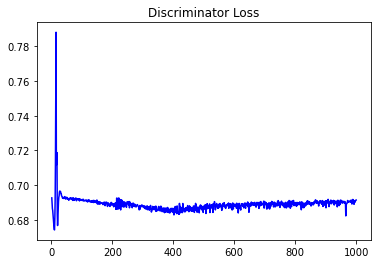

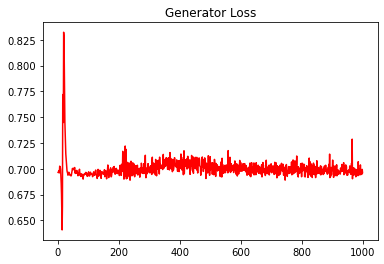

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.1681958802748914


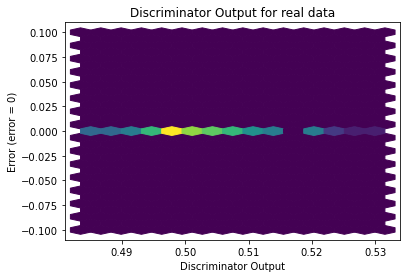

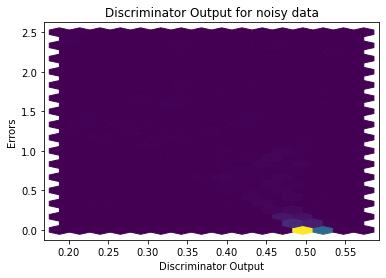

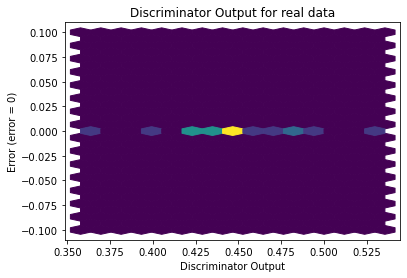

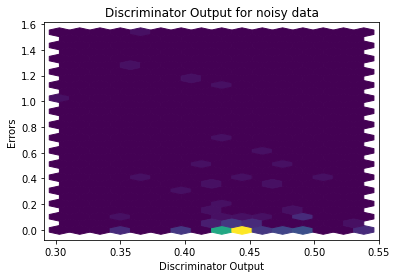

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


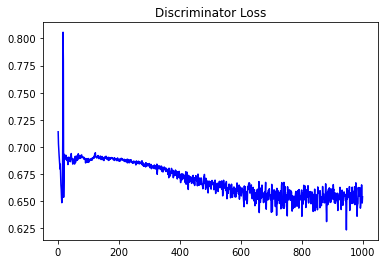

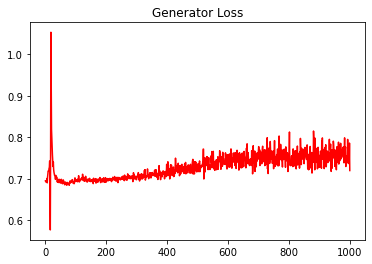

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.2941583729984351


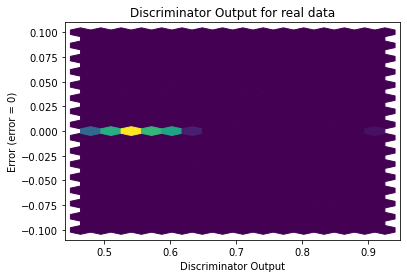

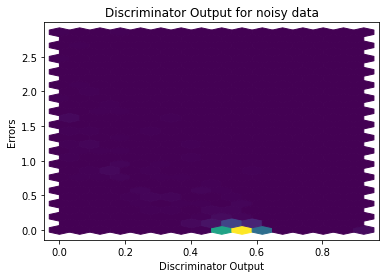

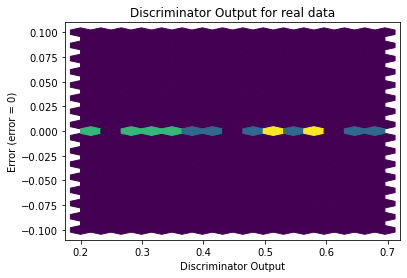

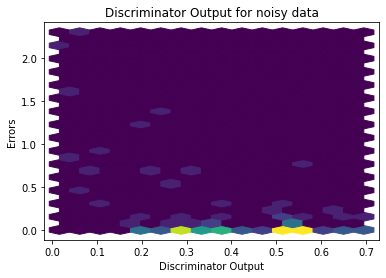

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1273]], requires_grad=True)
